# Regression

In [1]:
import pandas as pd

train_df = pd.read_csv('./Data/regression_train_data.csv',sep='\t')
test_df = pd.read_csv('./Data/regression_test_data.csv',sep='\t')

In [2]:
global_avg_days_grant = train_df['days_to_grant'].mean()  # optional fallback
train_df['avg_days_to_grant_l2'].fillna(global_avg_days_grant,inplace=True)           
train_df['avg_days_to_grant_l3'].fillna(global_avg_days_grant,inplace=True)    


/tmp/ipykernel_4179/2634852974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['avg_days_to_grant_l2'].fillna(global_avg_days_grant,inplace=True)
/tmp/ipykernel_4179/2634852974.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [4]:
train_df.columns

Index(['application_number', 'novelty_flag', 'Y_flag', 'search_report_date',
       'search_report_is_no_unity', 'top_l3_industry', 'top_l2_industry',
       'days_to_grant', 'months_to_grant', 'company_url',
       'avg_days_to_grant_company', 'avg_days_to_grant_attorney',
       'avg_days_to_grant_l2', 'avg_days_to_grant_l3', 'ratio_granted_company',
       'ratio_granted_attorney', 'log_company_applications',
       'log_attorney_applications', 'citations_ratio', 'log_total_citations'],
      dtype='object')

In [7]:
numeric_vars = ['days_to_grant','avg_days_to_grant_company','avg_days_to_grant_attorney','ratio_granted_company','ratio_granted_attorney','log_company_applications','log_attorney_applications',
           'citations_ratio', 'log_total_citations','avg_days_to_grant_l2',
 'avg_days_to_grant_l3']
to_keep = [ 'days_to_grant','avg_days_to_grant_company','avg_days_to_grant_attorney','ratio_granted_company','ratio_granted_attorney','log_company_applications','log_attorney_applications',
           'citations_ratio', 'log_total_citations','novelty_flag', 'Y_flag','search_report_is_no_unity','avg_days_to_grant_l2',
 'avg_days_to_grant_l3']
to_remove = [c for c in train_df.columns if c not in to_keep]

In [8]:
to_remove

['application_number',
 'search_report_date',
 'top_l3_industry',
 'top_l2_industry',
 'months_to_grant',
 'company_url']

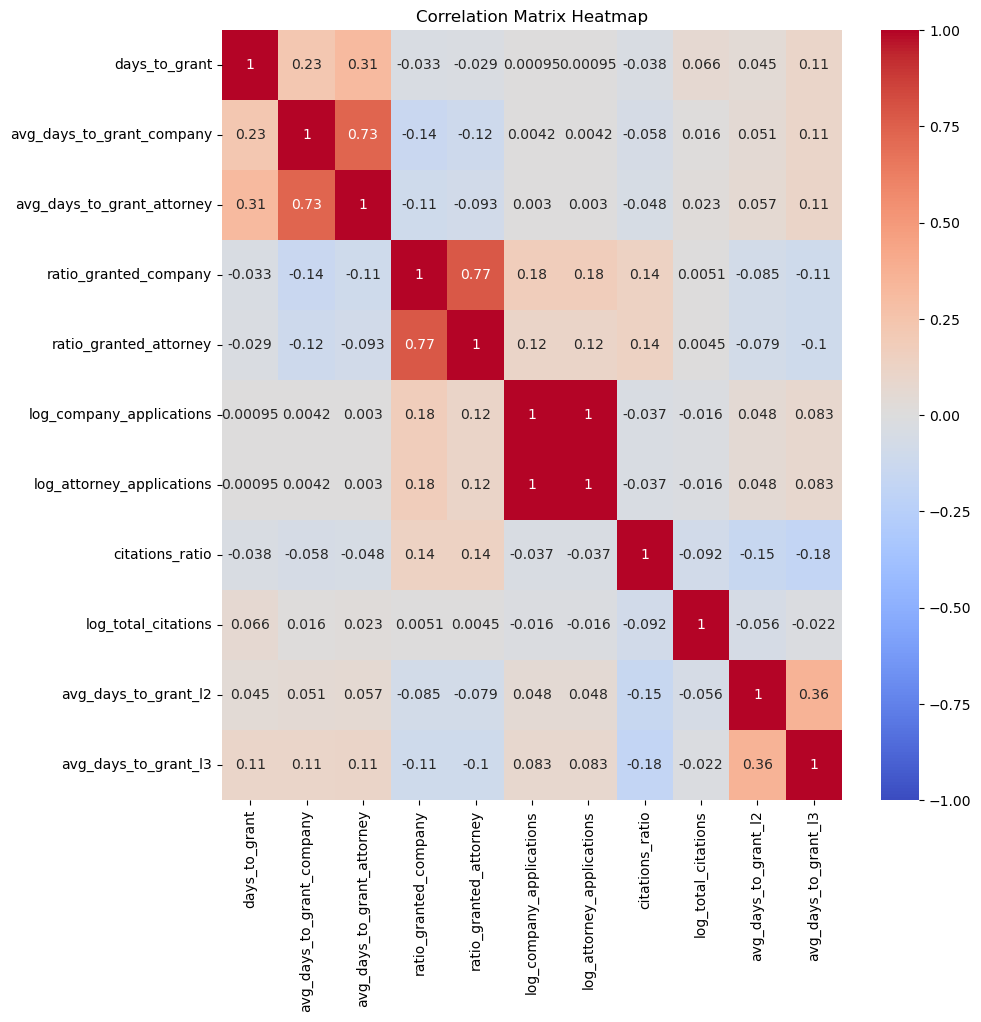

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = train_df[numeric_vars]
corr_matrix = df.corr()

# --- Visualize the Correlation Matrix ---
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [9]:
train_df.drop(columns=to_remove,inplace=True)
test_df.drop(columns=to_remove,inplace=True)

In [19]:
def remove_outliers_iqr(df, columns=None, multiplier=1.5):
    """
    Remove outliers from a DataFrame using the IQR method.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list, optional): List of columns to check for outliers.
                                  If None, all numeric columns will be used.
        multiplier (float): The multiplier for the IQR to determine the bounds (default 1.5).
        
    Returns:
        pd.DataFrame: A DataFrame with outliers removed.
    """
    # If no specific columns are provided, use all numeric columns.
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_clean = df.copy()
    
    for col in columns:
        # Compute Q1 and Q3
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Filter the DataFrame for this column
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

In [22]:
train_df = remove_outliers_iqr(train_df, columns=['days_to_grant'], multiplier=1.5)
test_df =  remove_outliers_iqr(train_df, columns=['days_to_grant'], multiplier=1.5)

In [42]:
y = ['days_to_grant']
X = [c for c in train_df.columns if c not in y]

X_train = train_df[X]
X_test = test_df[X]

y_train = train_df[y]
y_test = test_df[y]

Feature Importances:
                        Feature  Coefficient    Absolute
0                 novelty_flag   298.564017  298.564017
1                       Y_flag    97.958426   97.958426
11             citations_ratio   -43.953550   43.953550
8       ratio_granted_attorney   -35.365197   35.365197
12         log_total_citations    23.954539   23.954539
2    search_report_is_no_unity    21.663824   21.663824
7        ratio_granted_company     3.189804    3.189804
10   log_attorney_applications    -2.905459    2.905459
9     log_company_applications    -2.905459    2.905459
4   avg_days_to_grant_attorney     0.737476    0.737476
6         avg_days_to_grant_l3     0.569055    0.569055
5         avg_days_to_grant_l2     0.102078    0.102078
3    avg_days_to_grant_company    -0.009453    0.009453


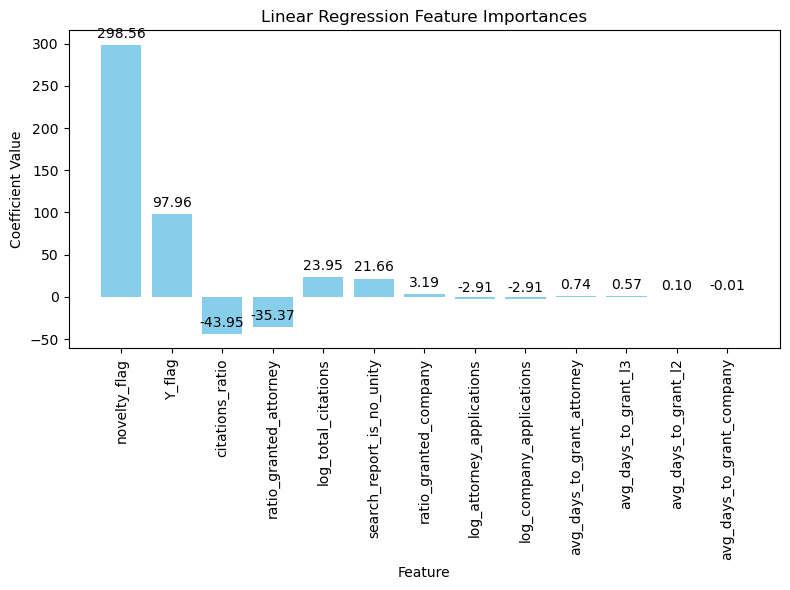

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split







lr = LinearRegression()
lr.fit(X_train, y_train)


# Flattening ensures that the coefficients array is 1-dimensional.
coefficients = lr.coef_.ravel()
features = X_train.columns

# Create a DataFrame for better visualization and sorting.
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Absolute'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute', ascending=False)
print("Feature Importances:\n", coef_df)

# -----------------------------
# 5. Visualize the Feature Importances
# -----------------------------
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
bars = plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Feature Importances')

# Annotate the bars with their coefficient values.
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


Mean Squared Error: 227753.365
Mean Absolute Error: 384.003
R² Score: 0.163
y_test range:  days_to_grant    120
dtype: int64 days_to_grant    2590
dtype: int64
y_pred range:  156.37046877060595 2656.0539998805675


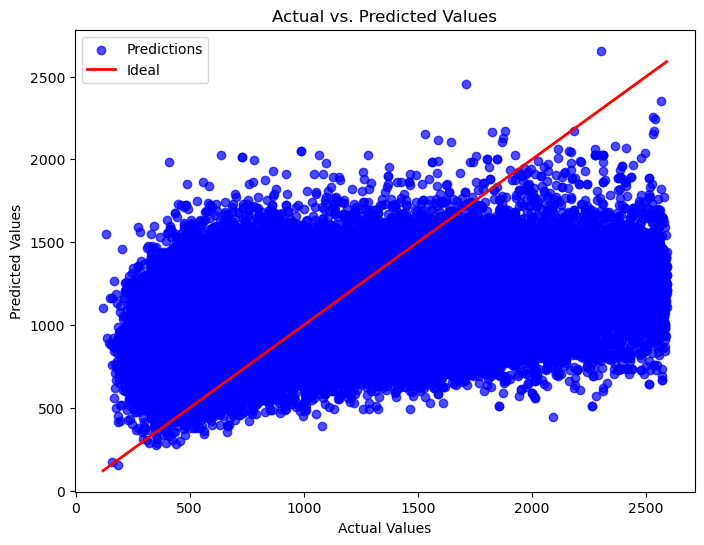

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# -----------------------------
# 4. Get Predictions on the Test Set
# -----------------------------
y_pred = lr.predict(X_test)

# -----------------------------
# 5. Evaluate the Predictions
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.3f}")

# Debug: Print ranges of actual and predicted values
print("y_test range: ", y_test.min(), y_test.max())
print("y_pred range: ", y_pred.min(), y_pred.max())

# -----------------------------
# 6. Visualize Actual vs. Predicted Values
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')

# Plot the ideal line where prediction equals actual.
# (This line is drawn from the min to max of y_test.)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Optionally, manually adjust the axis limits if needed.
# For example, if your predictions are very far off, you can set:
# plt.xlim(y_test.min() - 50, y_test.max() + 50)
# plt.ylim(y_test.min() - 50, y_test.max() + 50)


## L1 L2 regularisation

In [29]:
X_train.describe()

,avg_days_to_grant_company,avg_days_to_grant_attorney,avg_days_to_grant_l2,avg_days_to_grant_l3,ratio_granted_company,ratio_granted_attorney,log_company_applications,log_attorney_applications,citations_ratio,log_total_citations
count,120295.000000,120295.000000,120295.000000,120295.000000,120295.000000,120295.000000,120295.000000,120295.000000,120295.000000,120295.000000
mean,1134.226484,1132.139115,1135.843547,1135.642040,0.649017,0.660599,6.755294,6.755294,0.908918,1.602849
std,135.440265,183.370252,27.152669,64.144154,0.095936,0.117031,1.489574,1.489574,0.224076,0.366959
min,159.000000,159.000000,1103.270382,859.461538,0.071429,0.071429,0.693147,0.693147,0.000000,0.693147
25%,1057.875937,1007.113063,1123.087312,1083.928293,0.587002,0.583333,5.762051,5.762051,1.000000,1.386294
50%,1122.991582,1100.235461,1123.087312,1141.778131,0.642147,0.665698,7.022868,7.022868,1.000000,1.609438
75%,1202.452452,1252.921320,1126.462526,1192.522666,0.705426,0.736842,7.827241,7.827241,1.000000,1.791759
max,2619.000000,3146.000000,1198.877235,1570.400000,1.000000,1.000000,9.145802,9.145802,1.000000,3.931826


In [30]:
to_normalise = ['avg_days_to_grant_attorney' 	,'avg_days_to_grant_l2' 	,'avg_days_to_grant_l3','avg_days_to_grant_company','log_attorney_applications','log_total_citations']

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def normalize_columns(df, columns, method='standard'):
    """
    Normalize specified columns in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of column names to normalize.
        method (str): The normalization method ('standard' for StandardScaler,
                      or 'minmax' for MinMaxScaler).
    
    Returns:
        pd.DataFrame: A new DataFrame with the specified columns normalized.
    """
    # Create a copy to avoid modifying the original DataFrame
    df_norm = df.copy()
    
    # Choose the scaling method
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Method must be either 'standard' or 'minmax'")
    
    # Apply the scaler to the specified columns
    df_norm[columns] = scaler.fit_transform(df_norm[columns])
    return df_norm

In [43]:
X_train = normalize_columns(X_train,to_normalise)
X_test = normalize_columns(X_test,to_normalise)

Lasso Regression Coefficients:
                       Feature  Coefficient    Absolute
0                 novelty_flag   298.091763  298.091763
4   avg_days_to_grant_attorney   134.894068  134.894068
1                       Y_flag    97.431740   97.431740
11             citations_ratio   -42.342843   42.342843
6         avg_days_to_grant_l3    36.555753   36.555753
8       ratio_granted_attorney   -26.194685   26.194685
2    search_report_is_no_unity    19.808769   19.808769
12         log_total_citations     8.853468    8.853468
9     log_company_applications    -5.794886    5.794886
5         avg_days_to_grant_l2     2.769761    2.769761
3    avg_days_to_grant_company    -0.801360    0.801360
7        ratio_granted_company    -0.000000    0.000000
10   log_attorney_applications    -0.000000    0.000000


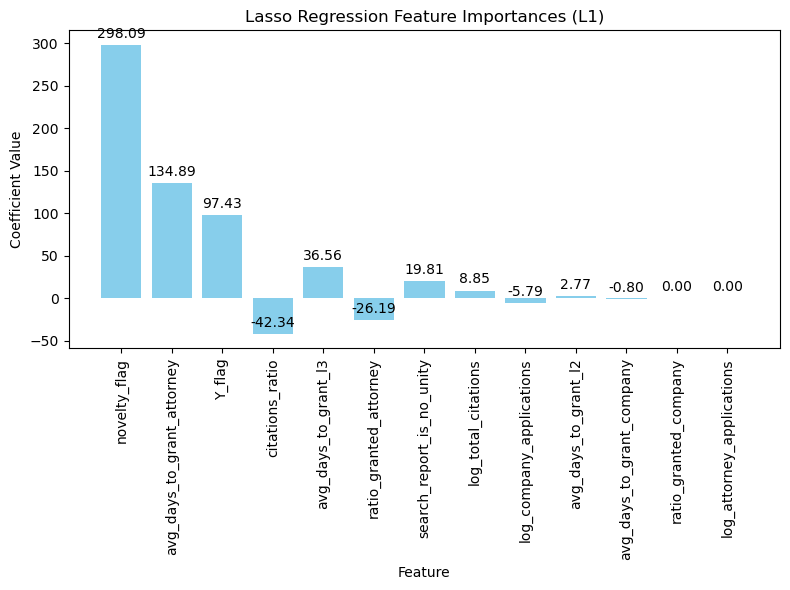

y_test values:
 [[1240]
 [1328]
 [ 567]
 ...
 [ 768]
 [ 595]
 [1245]]
y_pred values:
 [ 755.2764632   952.75937059 1390.79267562 ... 1017.7884252  1311.34929446
 1161.16437117]

Lasso Regression Metrics:
Mean Squared Error: 227768.070
Mean Absolute Error: 384.106
R² Score: 0.163

Combined range:
min_val: 120 max_val: 2657.270590299207


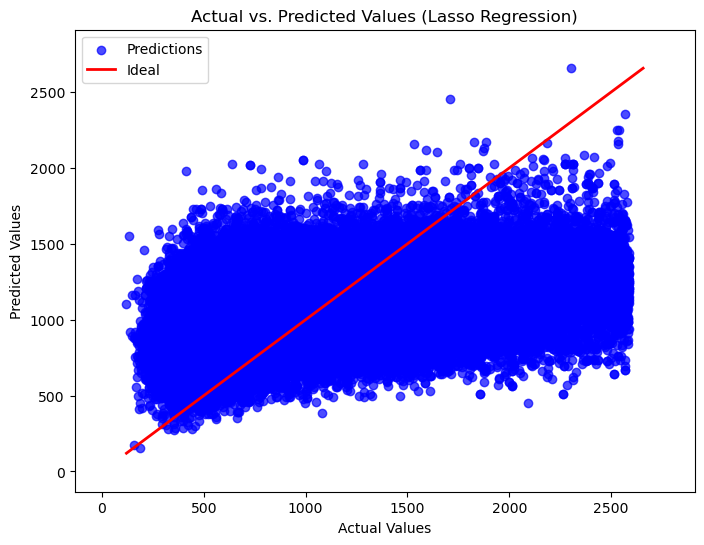

In [40]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lasso = Lasso(alpha=0.1, max_iter=10000)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# -----------------------------
# 4. Retrieve and Visualize the Coefficients
# -----------------------------
coefficients = lasso.coef_.ravel()  # Ensure a 1D array
features = X_train.columns

# Create a DataFrame for better visualization and sorting.
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Absolute'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute', ascending=False)
print("Lasso Regression Coefficients:")
print(coef_df)

# Bar Chart of Feature Importances
plt.figure(figsize=(8, 6))
bars = plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Feature Importances (L1)')
plt.xticks(rotation=90)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Get Predictions and Evaluate the Model
# -----------------------------
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Debug prints: show the raw y_test and y_pred values
print("y_test values:\n", y_test.values)
print("y_pred values:\n", y_pred)

print("\nLasso Regression Metrics:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.3f}")

# Determine the combined range for plotting using np.min and np.max
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
print("\nCombined range:")
print("min_val:", min_val, "max_val:", max_val)

# -----------------------------
# 5. Visualize Actual vs. Predicted Values
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')

# Plot the ideal 45° line from (min_val, min_val) to (max_val, max_val)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Ideal')

# Add some padding to the axis limits for better visualization.
padding = 0.1 * (max_val - min_val)
plt.xlim(min_val - padding, max_val + padding)
plt.ylim(min_val - padding, max_val + padding)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Lasso Regression)")
plt.legend()
plt.show()
plt.show()

Ridge Regression Coefficients:
                       Feature  Coefficient    Absolute
0                 novelty_flag   298.551950  298.551950
4   avg_days_to_grant_attorney   135.228613  135.228613
1                       Y_flag    97.953362   97.953362
11             citations_ratio   -43.945477   43.945477
6         avg_days_to_grant_l3    36.501636   36.501636
8       ratio_granted_attorney   -35.306804   35.306804
2    search_report_is_no_unity    21.662467   21.662467
12         log_total_citations     8.791543    8.791543
9     log_company_applications    -4.005304    4.005304
7        ratio_granted_company     3.130404    3.130404
5         avg_days_to_grant_l2     2.772077    2.772077
10   log_attorney_applications    -2.688904    2.688904
3    avg_days_to_grant_company    -1.278452    1.278452


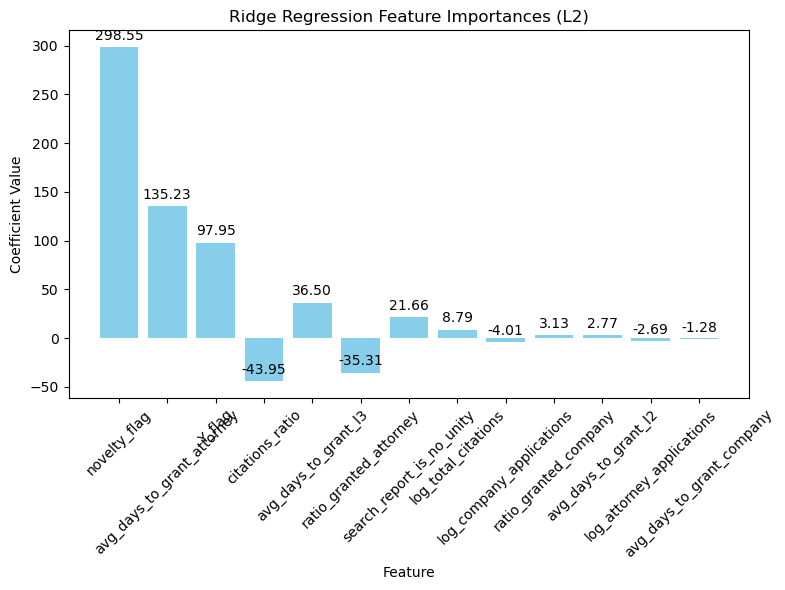


Combined range:
min_val: 120 max_val: 2662.349305901918


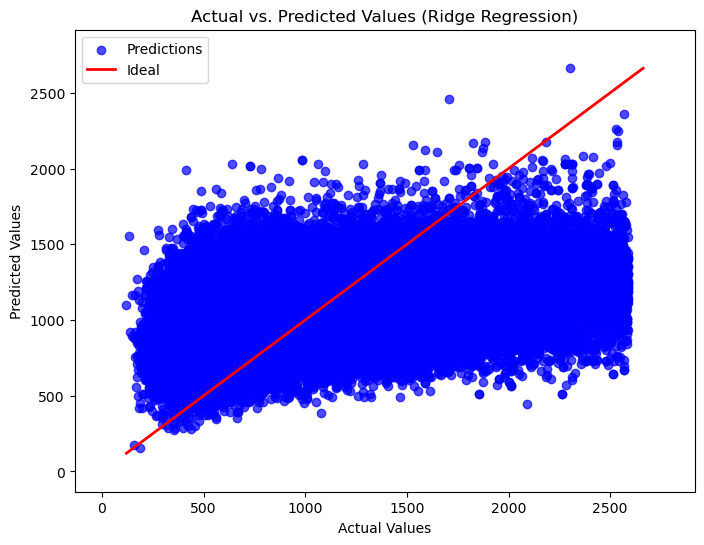

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# 3. Fit a Ridge Regression Model (L2 Regularization)
# -----------------------------
ridge = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge.fit(X_train, y_train)

# -----------------------------
# 4. Retrieve and Visualize the Coefficients
# -----------------------------
coefficients = ridge.coef_.ravel()  # Ensure a 1D array
features = X_train.columns

# Create a DataFrame for better visualization and sorting.
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_df['Absolute'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute', ascending=False)
print("Ridge Regression Coefficients:")
print(coef_df)

# Bar Chart of Feature Importances
plt.figure(figsize=(8, 6))
bars = plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Feature Importances (L2)')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.tight_layout()
plt.show()

# -----------------------------
# 5. Get Predictions and Evaluate the Model
# -----------------------------
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Determine the combined range for plotting using np.min and np.max
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
print("\nCombined range:")
print("min_val:", min_val, "max_val:", max_val)

# -----------------------------
# 5. Visualize Actual vs. Predicted Values
# -----------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predictions')

# Plot the ideal 45° line from (min_val, min_val) to (max_val, max_val)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Ideal')

# Add some padding to the axis limits for better visualization.
padding = 0.1 * (max_val - min_val)
plt.xlim(min_val - padding, max_val + padding)
plt.ylim(min_val - padding, max_val + padding)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Ridge Regression)")
plt.legend()
plt.show()
plt.show()

# Clustering

In [1]:
import pandas as pd
clustering_data = pd.read_csv('./Data/clustering_dataset.csv',sep='\t')

In [3]:
clustering_data.columns

Index(['Unnamed: 0', 'application_number', 'publication_date',
       'publication_language', 'rep_name', 'total_citations',
       'patent_citations', 'novelty_flag', 'inventive_step_flag',
       'patent_granted', 'filing_date', 'patent_granted_date', 'Y_flag',
       'search_report_date', 'search_report_ipc_field',
       'search_report_is_no_unity', 'search_report_is_incomplete_search',
       'search_report_is_no_search', 'num_fields', 'dominant_section',
       'secondary_section', 'num_in_dominant', 'num_in_secondary',
       'num_sections', 'top_l3_industry', 'top_l2_industry',
       'parsed_abstract'],
      dtype='object')

In [17]:
abstracts = list(clustering_data['parsed_abstract'])

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Convert abstracts to vectors using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(abstracts)

In [12]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering


Searching for optimal DBSCAN parameters...

eps: 0.10, min_samples: 2, clusters (excl. noise): 130, silhouette score: 0.247
eps: 0.10, min_samples: 3 produced less than 2 clusters; skipping silhouette score.
eps: 0.10, min_samples: 4 produced less than 2 clusters; skipping silhouette score.
eps: 0.10, min_samples: 5 produced less than 2 clusters; skipping silhouette score.
eps: 0.20, min_samples: 2, clusters (excl. noise): 130, silhouette score: 0.247
eps: 0.20, min_samples: 3 produced less than 2 clusters; skipping silhouette score.
eps: 0.20, min_samples: 4 produced less than 2 clusters; skipping silhouette score.
eps: 0.20, min_samples: 5 produced less than 2 clusters; skipping silhouette score.
eps: 0.30, min_samples: 2, clusters (excl. noise): 130, silhouette score: 0.247
eps: 0.30, min_samples: 3 produced less than 2 clusters; skipping silhouette score.
eps: 0.30, min_samples: 4 produced less than 2 clusters; skipping silhouette score.
eps: 0.30, min_samples: 5 produced less than

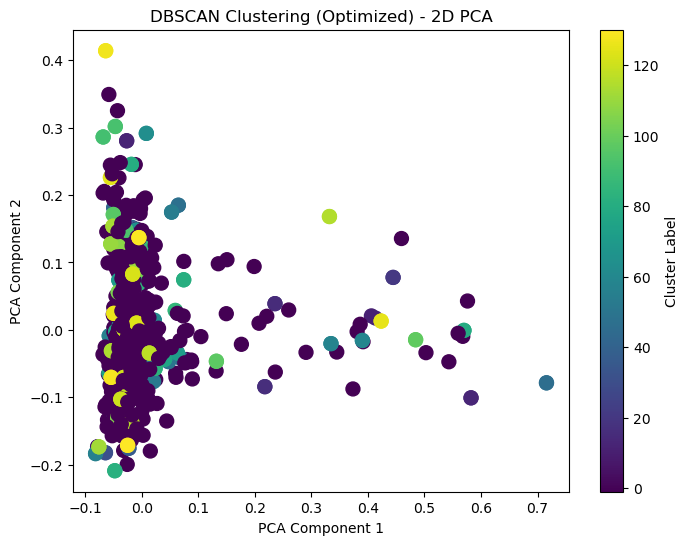

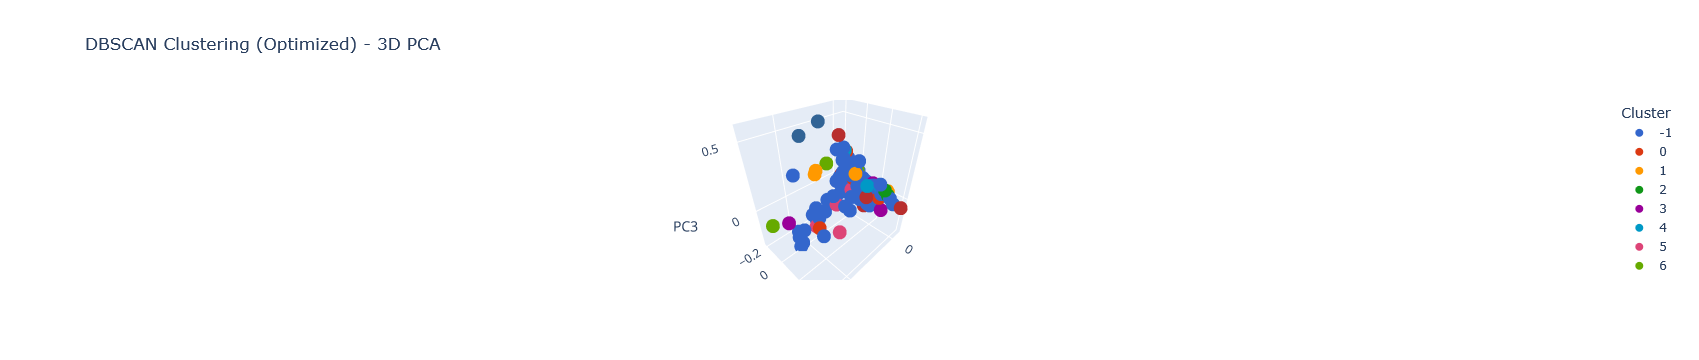

In [26]:
# Convert the abstracts to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=1)
X_sparse = vectorizer.fit_transform(abstracts)
X_dense = X_sparse.toarray()  # DBSCAN (and silhouette score) requires a dense representation

# --- Step 2: Grid Search for Optimal DBSCAN Parameters ---
# Define ranges for eps and min_samples. Adjust these ranges based on your data scale.
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = [2, 3, 4, 5]

best_score = -1
best_params = None
best_labels = None

print("Searching for optimal DBSCAN parameters...\n")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_dense)
        
        # Count clusters (excluding noise labeled as -1)
        cluster_labels = [label for label in labels if label != -1]
        n_clusters = len(set(cluster_labels))
        
        # Evaluate silhouette score only if there are at least 2 clusters
        if n_clusters > 1:
            score = silhouette_score(X_dense, labels)
            print(f"eps: {eps:.2f}, min_samples: {min_samples}, clusters (excl. noise): {n_clusters}, silhouette score: {score:.3f}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = labels
        else:
            print(f"eps: {eps:.2f}, min_samples: {min_samples} produced less than 2 clusters; skipping silhouette score.")

if best_params is not None:
    print(f"\nOptimal parameters: eps = {best_params[0]:.2f}, min_samples = {best_params[1]} with silhouette score = {best_score:.3f}")
else:
    print("No valid clustering (at least 2 clusters) found in the specified parameter grid.")

# --- Step 3: Visualize the Best DBSCAN Clustering ---
if best_labels is not None:
    # Option A: Visualize in 2D using PCA and matplotlib
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_dense)
    
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis', s=100)
    plt.title("DBSCAN Clustering (Optimized) - 2D PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

    # Option B: Visualize in 3D using PCA and Plotly (interactive)
    pca3d = PCA(n_components=3, random_state=42)
    X_pca3d = pca3d.fit_transform(X_dense)
    df = pd.DataFrame(X_pca3d, columns=['PC1', 'PC2', 'PC3'])
    df['Cluster'] = best_labels.astype(str)  # Convert labels to string for categorical coloring

    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                        color='Cluster',
                        title="DBSCAN Clustering (Optimized) - 3D PCA",
                        color_discrete_sequence=px.colors.qualitative.G10)
    fig.update_traces(marker=dict(size=8))
    fig.show()

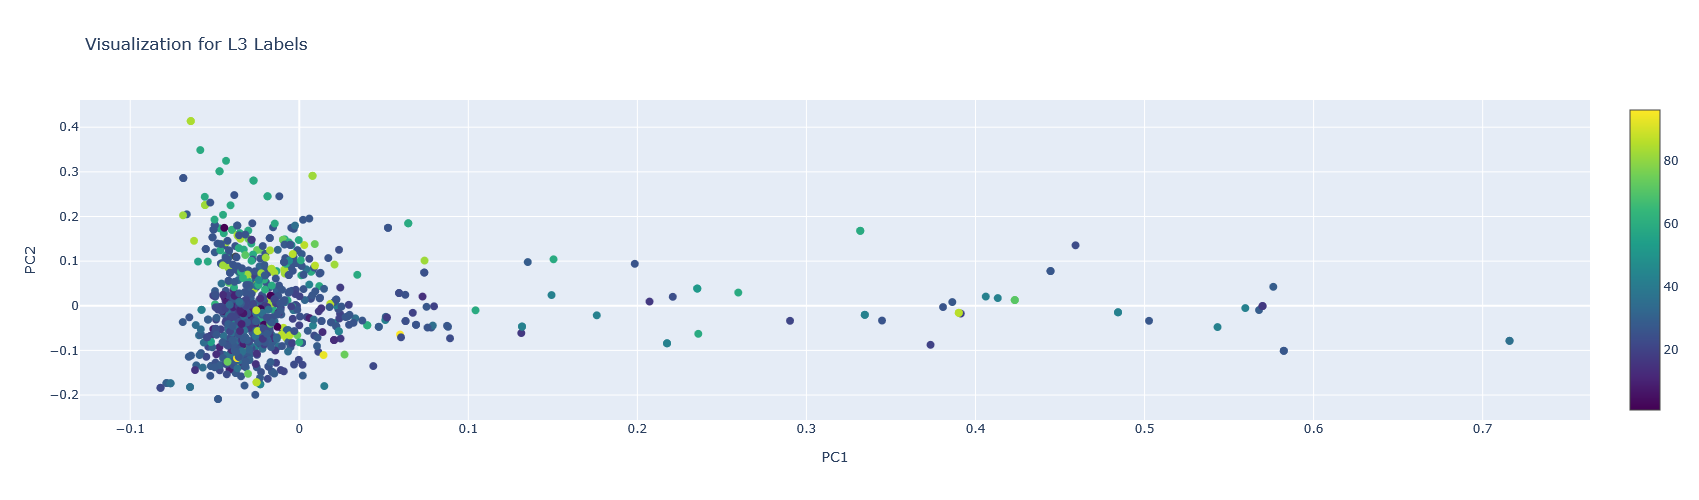

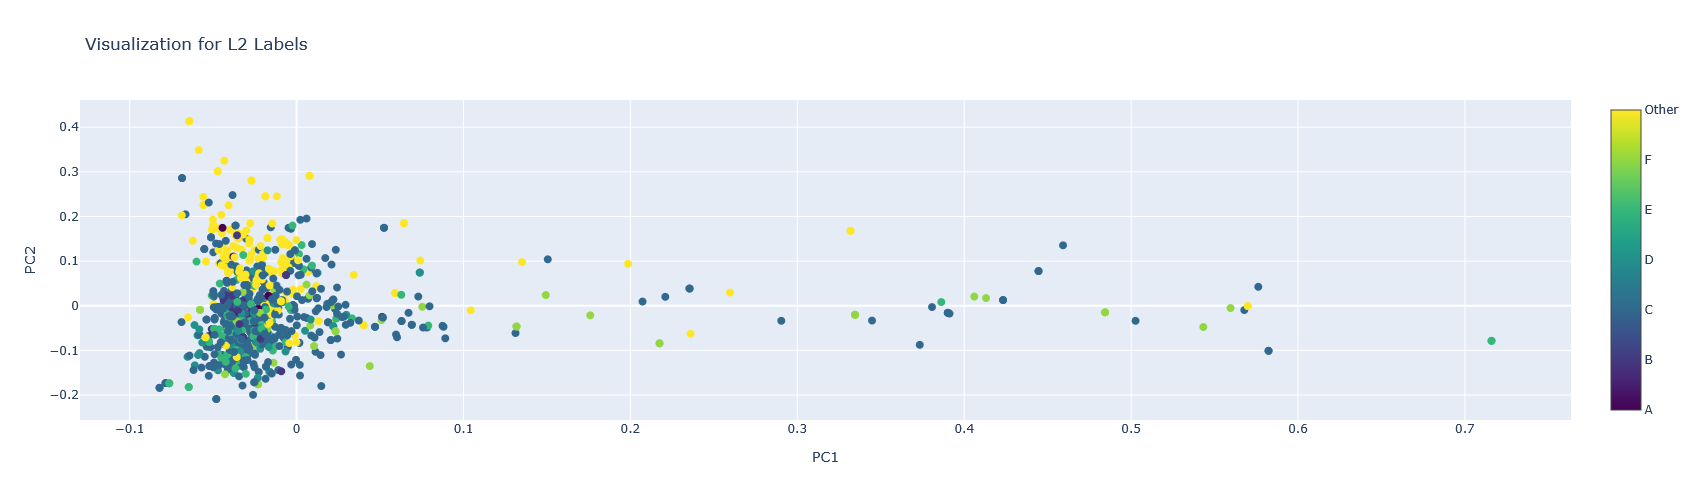

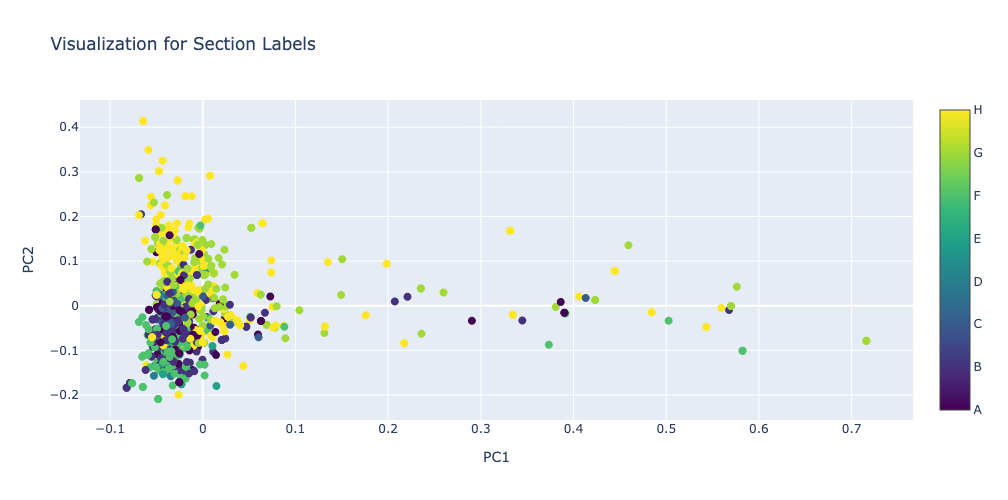

In [27]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assume X_pca is your 2D projection (e.g., from PCA) with shape (n_samples, 2)
# And you have three label lists: l3_labels, l2_labels, secion_labels

# Example dummy data:
import numpy as np
np.random.seed(42)
n_samples = 50
l3_labels = clustering_data['top_l3_industry']
l2_labels = clustering_data['top_l2_industry']
secion_labels = clustering_data['dominant_section']

# Create a DataFrame to hold the data and labels.
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['L3'] = l3_labels
df['L2'] = l2_labels
df['Section'] = secion_labels

# Create subplots: one row, three columns
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=["L3 Labels", "L2 Labels", "Section Labels"],
    horizontal_spacing=0.08
)
def plot_label_scatter(df, color_column, title):
    """
    Creates a Plotly scatter plot for the provided label column.
    If the column is categorical, it converts the labels to numeric codes
    and sets up a colorbar to display the corresponding category names.
    """
    fig = go.Figure()

    # Check if the column is numeric or categorical.
    if pd.api.types.is_numeric_dtype(df[color_column]):
        marker = dict(
            size=8,
            color=df[color_column],
            colorscale='Viridis',
            showscale=True
        )
        text = df[color_column].astype(str)
    else:
        # Convert categorical labels into numeric codes.
        cat = pd.Categorical(df[color_column])
        codes = cat.codes  # numeric codes for each category
        marker = dict(
            size=8,
            color=codes,
            colorscale='Viridis',
            cmin=0,
            cmax=len(cat.categories) - 1,
            showscale=True,
            colorbar=dict(
                tickmode='array',
                tickvals=list(range(len(cat.categories))),
                ticktext=list(cat.categories)
            )
        )
        text = df[color_column].astype(str)

    # Create the scatter plot.
    fig.add_trace(
        go.Scatter(
            x=df['PC1'],
            y=df['PC2'],
            mode='markers',
            marker=marker,
            text=text,
            name=color_column
        )
    )

    # Update layout with a title and axis labels.
    fig.update_layout(
        title=title,
        xaxis_title="PC1",
        yaxis_title="PC2",
        width=600,
        height=500
    )
    
    # Show the figure.
    fig.show()

# Create separate visualizations for each label set.
plot_label_scatter(df, 'L3', "Visualization for L3 Labels")
plot_label_scatter(df, 'L2', "Visualization for L2 Labels")
plot_label_scatter(df, 'Section', "Visualization for Section Labels")


For n_clusters = 2, the silhouette score is 0.005
For n_clusters = 3, the silhouette score is 0.006
For n_clusters = 4, the silhouette score is 0.005
For n_clusters = 5, the silhouette score is 0.005
For n_clusters = 6, the silhouette score is 0.008
For n_clusters = 7, the silhouette score is 0.006
For n_clusters = 8, the silhouette score is 0.007
For n_clusters = 9, the silhouette score is 0.008
For n_clusters = 10, the silhouette score is 0.009
For n_clusters = 11, the silhouette score is 0.010
For n_clusters = 12, the silhouette score is 0.012
For n_clusters = 13, the silhouette score is 0.010
For n_clusters = 14, the silhouette score is 0.011
For n_clusters = 15, the silhouette score is 0.013
For n_clusters = 16, the silhouette score is 0.013
For n_clusters = 17, the silhouette score is 0.014
For n_clusters = 18, the silhouette score is 0.014
For n_clusters = 19, the silhouette score is 0.014
For n_clusters = 20, the silhouette score is 0.015
For n_clusters = 21, the silhouette sco

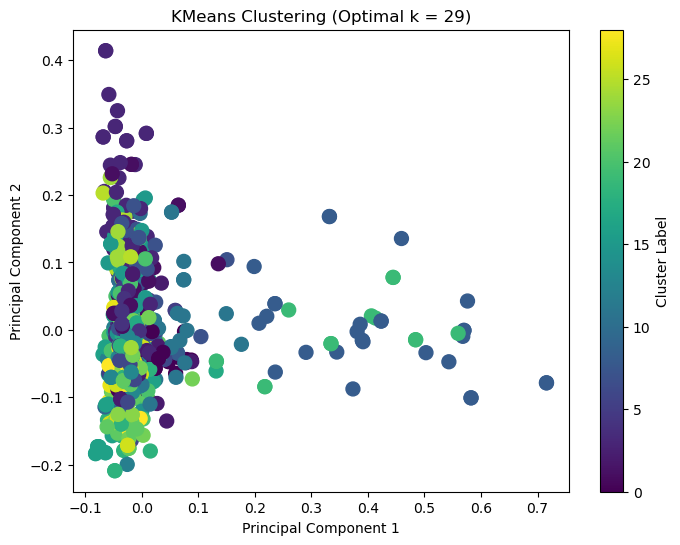

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Sample Data ---
# Replace these sample abstracts with your own text data.

# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(stop_words='english')
X_sparse = tfidf.fit_transform(abstracts)
X_dense = X_sparse.toarray()

# --- Grid Search for Optimal Number of Clusters for KMeans ---
silhouette_scores = []
range_n_clusters = range(2, 30)  # Testing 2 to 7 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_dense)
    score = silhouette_score(X_dense, cluster_labels)
    silhouette_scores.append(score)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {score:.3f}")

best_k = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters for KMeans: {best_k}")

# --- Final KMeans Clustering ---
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans_final.fit_predict(X_dense)

# --- Dimensionality Reduction for Visualization ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense)

# --- Visualization ---
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis', s=100)
plt.title(f"KMeans Clustering (Optimal k = {best_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.show()


For n_clusters = 99, the silhouette score is 0.136
For n_clusters = 100, the silhouette score is 0.137
For n_clusters = 101, the silhouette score is 0.140
For n_clusters = 102, the silhouette score is 0.142
For n_clusters = 103, the silhouette score is 0.143
For n_clusters = 104, the silhouette score is 0.145
For n_clusters = 105, the silhouette score is 0.148
For n_clusters = 106, the silhouette score is 0.151
For n_clusters = 107, the silhouette score is 0.152
For n_clusters = 108, the silhouette score is 0.153
For n_clusters = 109, the silhouette score is 0.154
For n_clusters = 110, the silhouette score is 0.156
For n_clusters = 111, the silhouette score is 0.159
For n_clusters = 112, the silhouette score is 0.162
For n_clusters = 113, the silhouette score is 0.164
For n_clusters = 114, the silhouette score is 0.166
For n_clusters = 115, the silhouette score is 0.166
For n_clusters = 116, the silhouette score is 0.167
For n_clusters = 117, the silhouette score is 0.170
For n_cluster

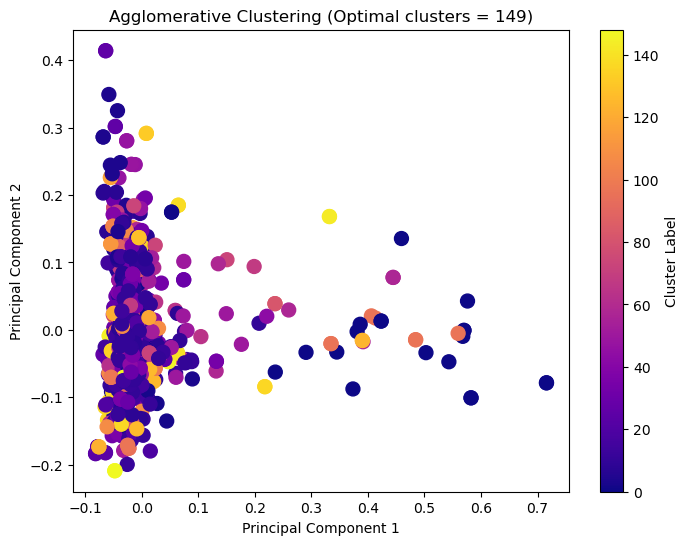

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# --- Sample Data ---
# Replace these sample abstracts with your own text data.


# --- TF-IDF Vectorization ---
tfidf = TfidfVectorizer(stop_words='english')
X_sparse = tfidf.fit_transform(abstracts)
X_dense = X_sparse.toarray()

# --- Grid Search for Optimal Number of Clusters for Agglomerative Clustering ---
silhouette_scores = []
range_n_clusters = range(99, 150)  # Testing 2 to 7 clusters

for n_clusters in range_n_clusters:
    # Using 'ward' linkage (requires Euclidean distance on dense data)
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = agglo.fit_predict(X_dense)
    score = silhouette_score(X_dense, cluster_labels)
    silhouette_scores.append(score)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {score:.3f}")

best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters for Agglomerative Clustering: {best_n_clusters}")

# --- Final Agglomerative Clustering ---
agglo_final = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
final_labels = agglo_final.fit_predict(X_dense)

# --- Dimensionality Reduction for Visualization ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense)

# --- Visualization ---
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='plasma', s=100)
plt.title(f"Agglomerative Clustering (Optimal clusters = {best_n_clusters})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.show()


We can see that the db scan clustering works the best for interpretebility, it manages to map the C class  (economic sector) quite well into one cluster. This makes sense since semantially since ht ecluster is (-1) the outliers this class (C) is the whole secondary sector of the economy and encompases alot of things. 